## MCP for Finance - Stock Researcher Agent

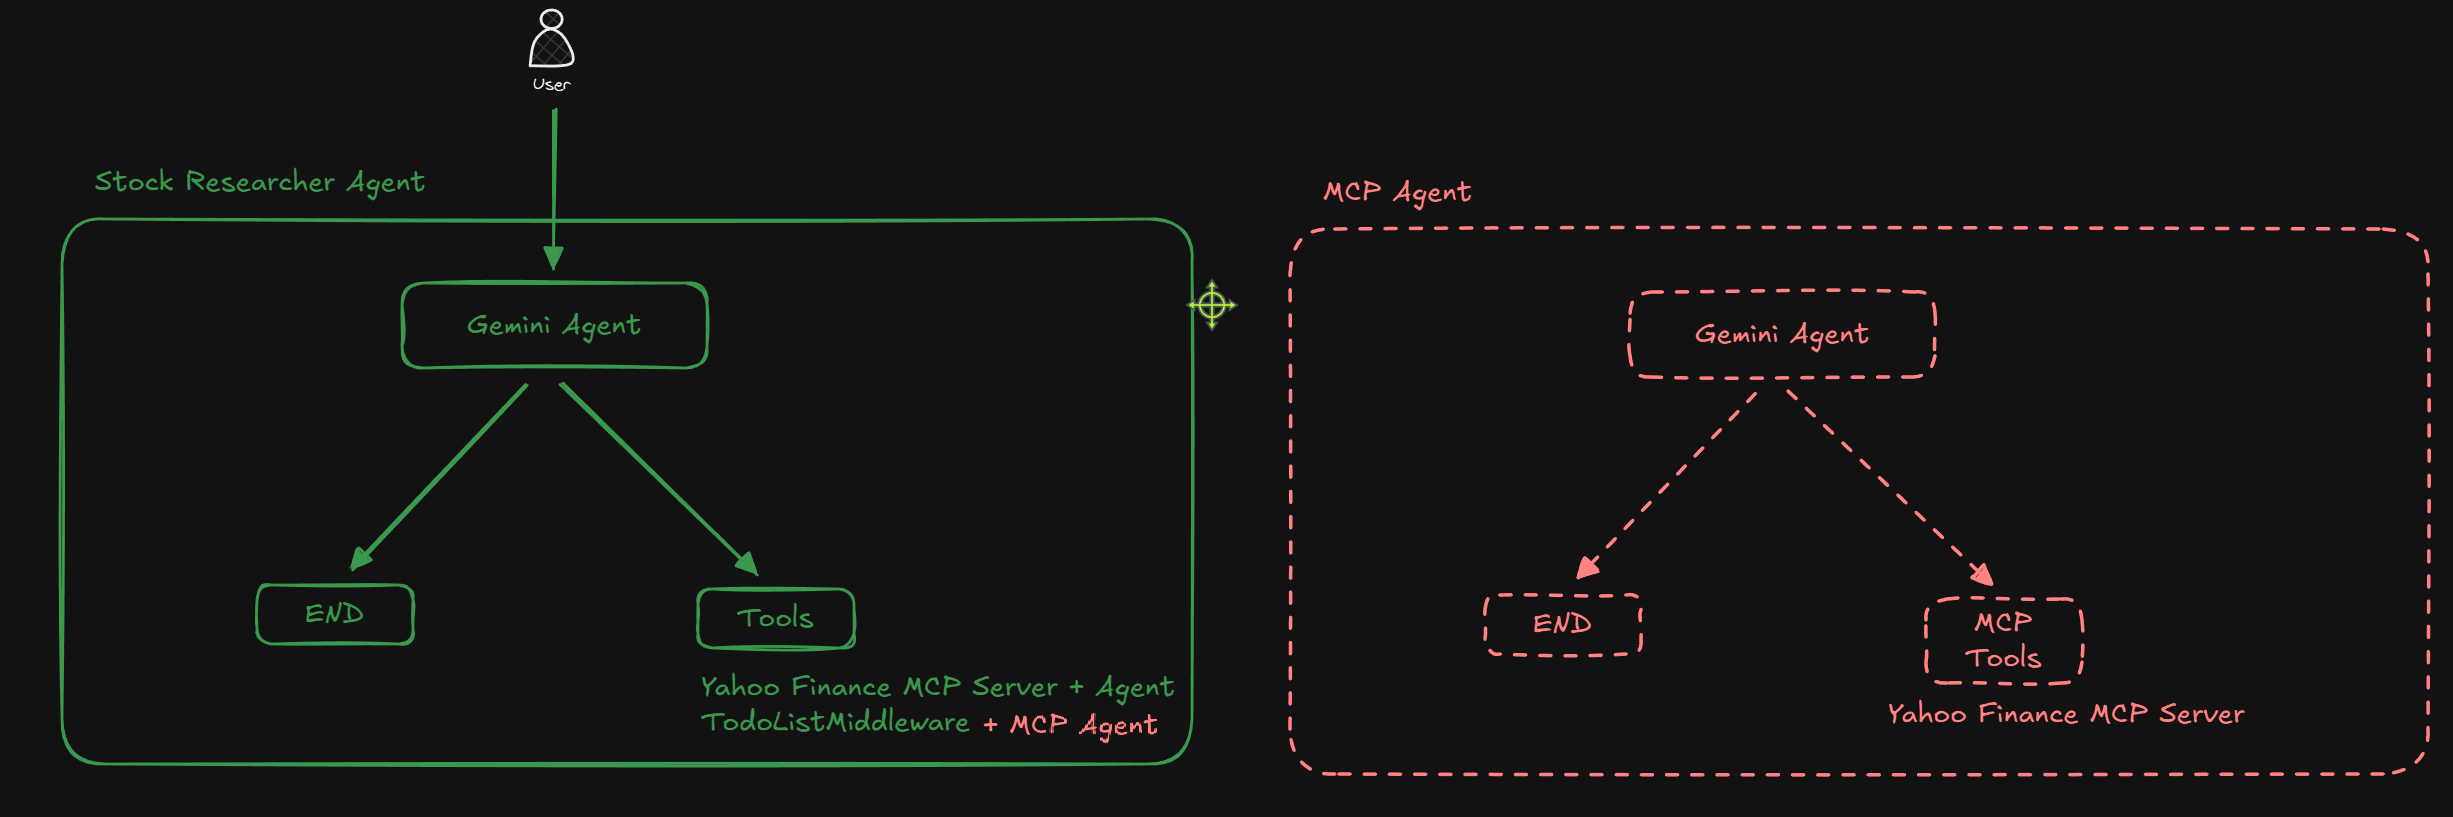

### Yahoo Finance Research Tool

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
from langchain.agents import create_agent
from langchain_core.messages import HumanMessage

from langchain_core.tools import tool
from langchain.agents.middleware import TodoListMiddleware

import subprocess
import sys

In [3]:
@tool
def finance_researcher(query: str):
    """Research stocks using Yahoo Finance MCP async function.
    
    Args:
        query: The finance related query or stock symbol to research.
    """

    code = f"""
import asyncio
from scripts.yahoo_mcp import finance_research
asyncio.run(finance_research("{query}"))
"""
    result = subprocess.run([sys.executable, '-c', code], capture_output=True, text=True)

    return result.stdout


In [4]:
query = "What is the current stock price and recent performance of Apple (AAPL)? Also show me the latest news."
response = finance_researcher.invoke({'query': query})

In [5]:
print(response)

### Apple Inc. (AAPL) Stock Information

**Current Stock Price:**
- **Price:** $267.26
- **Market Cap:** $3.97 trillion
- **Volume:** 41,463,468 shares
- **52-Week Range:** $169.21 - $288.62
- **Dividend Yield:** 0.38%

**Trading Data:**
- **Open:** $270.715
- **Day's Range:** $266.14 - $271.5
- **Previous Close:** $271.01
- **Beta (Volatility Measure):** 1.093

**Performance Metrics:**
- **PE Ratio (TTM):** 35.87
- **EPS (TTM):** $7.45
- **Profit Margins:** 26.92%
- **Revenue Growth:** 7.9% 

### Recent Stock Performance
The stock has shown some decline in recent trading sessions, experiencing a 1.38% decrease on the latest trading day. Over the past month, Apple’s share price has declined by approximately 2.8%. Despite short-term weaknesses, the one-year total shareholder return stands at 11.1%, indicating positive long-term performance.

### Latest News for Apple (AAPL)

1. **[Assessing Apple (AAPL) Valuation](https://finance.yahoo.com/news/assessing-apple-aapl-valuation-recent-1910

### Stock Researcher Agent

#### System Prompt

In [6]:
system_prompt = """You are a professional stock research analyst specializing in financial analysis.

**Your Responsibilities:**
1. Analyze stock performance and financial metrics
2. Research company fundamentals
3. Provide data-driven investment recommendations
4. You must use available tools to answer user queries

**Analysis Framework:**
- Company name and ticker symbol
- Current stock price
- Key metrics: P/E ratio, Market Cap, Revenue
- Financial health assessment
- Clear recommendation: Buy, Hold, or Sell

**Important Guidelines:**
- Only respond to finance and stock market related questions
- For non-finance questions, politely decline: "I apologize, but I can only assist with stock market and financial analysis questions. Please ask me about stocks, companies, or financial metrics."
- Always cite specific data and metrics
- Maintain professional and objective tone

Provide concise, actionable insights for investors."""

#### Create Agent

In [ ]:
from langchain.agents.middleware import TodoListMiddleware
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")

agent = create_agent(
    model=model,
    tools=[finance_researcher],
    system_prompt=system_prompt,
    middleware=[TodoListMiddleware()]
)

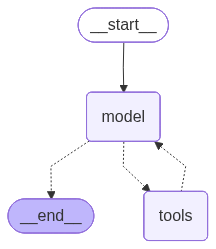

In [8]:
agent

#### Run Agent

In [9]:
response = agent.invoke({'messages': [HumanMessage('what is the weather in mumbai?')]})
response

{'messages': [HumanMessage(content='what is the weather in mumbai?', additional_kwargs={}, response_metadata={}, id='8f140fb2-1706-4e58-b99a-b9f5876704de'),
  AIMessage(content='I apologize, but I can only assist with stock market and financial analysis questions. Please ask me about stocks, companies, or financial metrics.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 1315, 'total_tokens': 1344, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-Cun6dvpLGt6A7EPgwk96gmOoGSiXQ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b9038-49c3-7611-ba3a-df32a1368e5e-0', tool_calls=[], invalid_tool_calls=[], usage_metada

In [10]:
query = "Analyze Apple (AAPL) stock and its competitors like MSFT and Google. Present data clearly in the table."

response = agent.invoke({'messages': [HumanMessage(query)]})

In [11]:
response

{'messages': [HumanMessage(content='Analyze Apple (AAPL) stock and its competitors like MSFT and Google. Present data clearly in the table.', additional_kwargs={}, response_metadata={}, id='98d9ebca-28d9-41f2-85c5-f2af5fce528b'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 1330, 'total_tokens': 1398, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-Cun6kXKcw2kmYxbAn47hwVMc4ncC2', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b9038-64fe-73b3-b385-30dae4671358-0', tool_calls=[{'name': 'finance_researcher', 'args': {'query': 'AAPL'}, 'id': 'call_9IhYbkhkYvipapP3AQHvStxU', 'type': '

In [12]:
from IPython.display import display, Markdown

display(Markdown(response['messages'][-1].text))


Here's a comparative table for Apple (AAPL), Microsoft (MSFT), and Alphabet (GOOGL) based on the recent data gathered:

| Metric                         | Apple (AAPL)        | Microsoft (MSFT)    | Alphabet (GOOGL)    |
|-------------------------------|---------------------|---------------------|---------------------|
| **Current Stock Price**       | $267.26             | $472.85             | $316.54             |
| **Market Cap**                | $3.97 Trillion      | $3.51 Trillion      | $3.83 Trillion      |
| **P/E Ratio (TTM)**           | 35.87               | 33.65               | 31.28               |
| **Revenue (TTM)**             | $416.16 Billion     | $293.81 Billion     | ($ not provided)    |
| **EPS (TTM)**                 | $7.45               | ($ not provided)    | $10.12              |
| **Profit Margin**             | 26.92%              | 35.71%              | ($ not provided)    |
| **Dividend Yield**            | 0.38%               | 0.77%               | 0.27%               |
| **52-Week Range**             | $169.21 - $288.62   | $344.79 - $555.45   | $140.53 - $328.83   |
| **Beta**                      | 1.093               | ($ not provided)    | 1.086               |
| **Analyst Recommendation**    | Buy (Mean: 2.0)     | Strong Buy (Mean: 1.28) | Strong Buy        |

### Investment Insights
1. **Apple (AAPL)**
   - **Recommendation:** Buy
   - **Positive**: Strong market cap and consistent performance.
   - **Considerations**: Slightly higher P/E ratio than peers, indicating potentially higher valuation.

2. **Microsoft (MSFT)**
   - **Recommendation:** Strong Buy
   - **Positive**: High market cap and robust growth, especially in cloud and AI sectors.
   - **Considerations**: Solid profit margins and stability in stock price.

3. **Alphabet (GOOGL)**
   - **Recommendation:** Strong Buy
   - **Positive**: Strong AI and cloud services growth.
   - **Considerations**: Continued investments in AI and recent upward stock trend.

Each company shows strengths in their respective segments. For more detailed analysis or additional data, please let me know!